<a href="https://colab.research.google.com/github/SOD-GIT/sod_resources/blob/main/cust_detect_sod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CHANGE RUNTIME TO GPU FIRST

In [2]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 13415, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 13415 (delta 23), reused 34 (delta 16), pack-reused 13368
Receiving objects: 100% (13415/13415), 12.13 MiB | 14.15 MiB/s, done.
Resolving deltas: 100% (9349/9349), done.


In [3]:
!pip install -r yolov5/requirements.txt

     |████████████████████████████████| 596 kB 4.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [38]:
def getSh(source):
    model_path = "/content/yolov5/detect.py"
    weights = "/content/sod_resources/v5x_best.pt"
    data_cfg = "/content/sod_resources/dataset.yaml"
    save_path = "/content/"
    test_cmd = "python {path} --source {src} --weights {wght} --data {cfg} --img {img_size} --conf=0.4 --project {sv_path} --name out"
    sh_cmd = test_cmd.format(src=source, path=model_path, wght=weights, cfg=data_cfg, img_size=256, sv_path=save_path)
    with open('run_script.sh', 'w') as file:
      file.write(sh_cmd)

In [39]:
# provide path of image
image_path = "/content/inp.jpg"
getSh(image_path)

In [40]:
# run this cell to get output
!bash run_script.sh

detect: weights=['/content/sod_cust_resources/v5x_best.pt'], source=/content/inp.jpg, data=/content/sod_cust_resources/dataset.yaml, imgsz=[256, 256], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/, name=output, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-190-g4d59f65 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 444 layers, 86233975 parameters, 0 gradients
image 1/1 /content/inp.jpg: 160x256 1 Helipad, Done. (0.247s)
Speed: 0.4ms pre-process, 247.1ms inference, 2.0ms NMS per image at shape (1, 3, 256, 256)
Results saved to /content/output


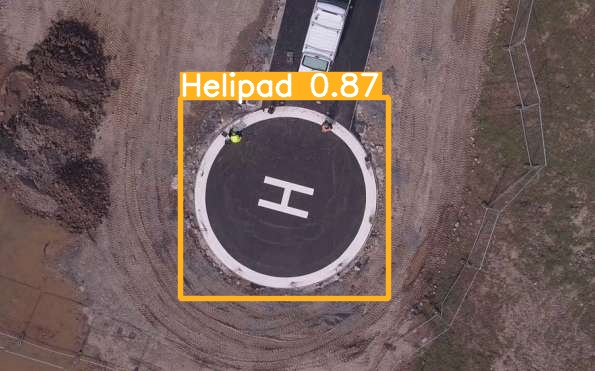

In [45]:
# show results
import cv2
from google.colab.patches import cv2_imshow
out_path = "/content/output/" + image_path.split('/')[-1]
img = cv2.imread(out_path)
cv2_imshow(img)